In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt;
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# Importing sklearn libraries
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.neighbors import NearestCentroid


# Importing Keras libraries
#from keras.utils import np_utils              It was older statement. Gave error. Changed by below. In below code need to change np_utils by utils
from keras import utils
from keras.models import Sequential
from keras.applications import VGG16
from keras.applications import imagenet_utils
from keras.callbacks import ModelCheckpoint
#from keras.preprocessing.image import load_img
from tensorflow.keras.utils import load_img
#from keras.preprocessing.image import img_to_array
from tensorflow.keras.utils import img_to_array
from keras.layers import Dense, Conv2D, MaxPooling2D
from keras.layers import Dropout, Flatten, GlobalAveragePooling2D

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import itertools
from sklearn.model_selection import KFold
import numpy as np
from sklearn_genetic import GASearchCV
from sklearn_genetic.space import Continuous, Categorical, Integer
from sklearn_genetic.plots import plot_fitness_evolution, plot_search_space
from sklearn.model_selection import cross_val_score
from sklearn.metrics import matthews_corrcoef

import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.model_selection import KFold
import numpy

import matplotlib.pyplot as plt

from scipy.stats import zscore
from sklearn import metrics
from sklearn.model_selection import KFold

from sklearn.metrics import accuracy_score

import math

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier


from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.model_selection import KFold
from sklearn.neural_network import MLPClassifier
from sklearn.svm import LinearSVC

In [3]:
#Loading Data of Main Database

X_H_All = [os.path.join("C:/Users/Liaqat Ali/Documents/ChiGaNet/NewHandPDImgs/HealthySpiral/HealthySpiral",img) for img in os.listdir("C:/Users/Liaqat Ali/Documents/ChiGaNet/NewHandPDImgs/HealthySpiral/HealthySpiral")]
X_PD_All = [os.path.join("C:/Users/Liaqat Ali/Documents/ChiGaNet/NewHandPDImgs/PatientSpiral/PatientSpiral",img) for img in os.listdir("C:/Users/Liaqat Ali/Documents/ChiGaNet/NewHandPDImgs/PatientSpiral/PatientSpiral")]

In [4]:
import natsort
#print(natsort.natsorted(X_PD_All,reverse=False))
#X_PD_All = natsort.natsorted(X_PD_All,reverse=False)
print(X_H_All)

['C:/Users/Liaqat Ali/Documents/ChiGaNet/NewHandPDImgs/HealthySpiral/HealthySpiral\\sp1-H1.jpg', 'C:/Users/Liaqat Ali/Documents/ChiGaNet/NewHandPDImgs/HealthySpiral/HealthySpiral\\sp1-H10.jpg', 'C:/Users/Liaqat Ali/Documents/ChiGaNet/NewHandPDImgs/HealthySpiral/HealthySpiral\\sp1-H11.jpg', 'C:/Users/Liaqat Ali/Documents/ChiGaNet/NewHandPDImgs/HealthySpiral/HealthySpiral\\sp1-H12.jpg', 'C:/Users/Liaqat Ali/Documents/ChiGaNet/NewHandPDImgs/HealthySpiral/HealthySpiral\\sp1-H13.jpg', 'C:/Users/Liaqat Ali/Documents/ChiGaNet/NewHandPDImgs/HealthySpiral/HealthySpiral\\sp1-H14.jpg', 'C:/Users/Liaqat Ali/Documents/ChiGaNet/NewHandPDImgs/HealthySpiral/HealthySpiral\\sp1-H16.jpg', 'C:/Users/Liaqat Ali/Documents/ChiGaNet/NewHandPDImgs/HealthySpiral/HealthySpiral\\sp1-H17.jpg', 'C:/Users/Liaqat Ali/Documents/ChiGaNet/NewHandPDImgs/HealthySpiral/HealthySpiral\\sp1-H18.jpg', 'C:/Users/Liaqat Ali/Documents/ChiGaNet/NewHandPDImgs/HealthySpiral/HealthySpiral\\sp1-H19.jpg', 'C:/Users/Liaqat Ali/Documents

In [5]:
print(X_PD_All)

['C:/Users/Liaqat Ali/Documents/ChiGaNet/NewHandPDImgs/PatientSpiral/PatientSpiral\\sp1-P1.jpg', 'C:/Users/Liaqat Ali/Documents/ChiGaNet/NewHandPDImgs/PatientSpiral/PatientSpiral\\sp1-P10.jpg', 'C:/Users/Liaqat Ali/Documents/ChiGaNet/NewHandPDImgs/PatientSpiral/PatientSpiral\\sp1-P11.jpg', 'C:/Users/Liaqat Ali/Documents/ChiGaNet/NewHandPDImgs/PatientSpiral/PatientSpiral\\sp1-P12.jpg', 'C:/Users/Liaqat Ali/Documents/ChiGaNet/NewHandPDImgs/PatientSpiral/PatientSpiral\\sp1-P13.jpg', 'C:/Users/Liaqat Ali/Documents/ChiGaNet/NewHandPDImgs/PatientSpiral/PatientSpiral\\sp1-P14.jpg', 'C:/Users/Liaqat Ali/Documents/ChiGaNet/NewHandPDImgs/PatientSpiral/PatientSpiral\\sp1-P15.jpg', 'C:/Users/Liaqat Ali/Documents/ChiGaNet/NewHandPDImgs/PatientSpiral/PatientSpiral\\sp1-P16.jpg', 'C:/Users/Liaqat Ali/Documents/ChiGaNet/NewHandPDImgs/PatientSpiral/PatientSpiral\\sp1-P17.jpg', 'C:/Users/Liaqat Ali/Documents/ChiGaNet/NewHandPDImgs/PatientSpiral/PatientSpiral\\sp1-P18.jpg', 'C:/Users/Liaqat Ali/Documents

In [6]:
import re

def custom_sort_key(path):
    # Extract the filename from the path
    filename = path.split('\\')[-1]  # Use '\\' for Windows paths

    # Use regex to extract the prefix and suffix numbers
    match = re.match(r'mea(\d+)-P(\d+)\.jpg$', filename)
    
    if match:
        mea_number = int(match.group(1))  # Extract number after 'mea'
        p_number = int(match.group(2))    # Extract number after 'P'
        return (p_number, mea_number)
    else:
        # Return a high default value or handle non-matching cases
        return (float('inf'), float('inf'))

# Filter out non-image files if necessary
X_PD_All_filtered = [path for path in X_PD_All if path.endswith('.jpg')]

# Sort the list using the custom key
X_PD_All_sorted = sorted(X_PD_All_filtered, key=custom_sort_key)

print(X_PD_All_sorted)


['C:/Users/Liaqat Ali/Documents/ChiGaNet/NewHandPDImgs/PatientSpiral/PatientSpiral\\sp1-P1.jpg', 'C:/Users/Liaqat Ali/Documents/ChiGaNet/NewHandPDImgs/PatientSpiral/PatientSpiral\\sp1-P10.jpg', 'C:/Users/Liaqat Ali/Documents/ChiGaNet/NewHandPDImgs/PatientSpiral/PatientSpiral\\sp1-P11.jpg', 'C:/Users/Liaqat Ali/Documents/ChiGaNet/NewHandPDImgs/PatientSpiral/PatientSpiral\\sp1-P12.jpg', 'C:/Users/Liaqat Ali/Documents/ChiGaNet/NewHandPDImgs/PatientSpiral/PatientSpiral\\sp1-P13.jpg', 'C:/Users/Liaqat Ali/Documents/ChiGaNet/NewHandPDImgs/PatientSpiral/PatientSpiral\\sp1-P14.jpg', 'C:/Users/Liaqat Ali/Documents/ChiGaNet/NewHandPDImgs/PatientSpiral/PatientSpiral\\sp1-P15.jpg', 'C:/Users/Liaqat Ali/Documents/ChiGaNet/NewHandPDImgs/PatientSpiral/PatientSpiral\\sp1-P16.jpg', 'C:/Users/Liaqat Ali/Documents/ChiGaNet/NewHandPDImgs/PatientSpiral/PatientSpiral\\sp1-P17.jpg', 'C:/Users/Liaqat Ali/Documents/ChiGaNet/NewHandPDImgs/PatientSpiral/PatientSpiral\\sp1-P18.jpg', 'C:/Users/Liaqat Ali/Documents

In [7]:
# Print sorted paths
for path in X_PD_All_sorted:
    print(path)

C:/Users/Liaqat Ali/Documents/ChiGaNet/NewHandPDImgs/PatientSpiral/PatientSpiral\sp1-P1.jpg
C:/Users/Liaqat Ali/Documents/ChiGaNet/NewHandPDImgs/PatientSpiral/PatientSpiral\sp1-P10.jpg
C:/Users/Liaqat Ali/Documents/ChiGaNet/NewHandPDImgs/PatientSpiral/PatientSpiral\sp1-P11.jpg
C:/Users/Liaqat Ali/Documents/ChiGaNet/NewHandPDImgs/PatientSpiral/PatientSpiral\sp1-P12.jpg
C:/Users/Liaqat Ali/Documents/ChiGaNet/NewHandPDImgs/PatientSpiral/PatientSpiral\sp1-P13.jpg
C:/Users/Liaqat Ali/Documents/ChiGaNet/NewHandPDImgs/PatientSpiral/PatientSpiral\sp1-P14.jpg
C:/Users/Liaqat Ali/Documents/ChiGaNet/NewHandPDImgs/PatientSpiral/PatientSpiral\sp1-P15.jpg
C:/Users/Liaqat Ali/Documents/ChiGaNet/NewHandPDImgs/PatientSpiral/PatientSpiral\sp1-P16.jpg
C:/Users/Liaqat Ali/Documents/ChiGaNet/NewHandPDImgs/PatientSpiral/PatientSpiral\sp1-P17.jpg
C:/Users/Liaqat Ali/Documents/ChiGaNet/NewHandPDImgs/PatientSpiral/PatientSpiral\sp1-P18.jpg
C:/Users/Liaqat Ali/Documents/ChiGaNet/NewHandPDImgs/PatientSpiral/Pati

In [8]:
def custom_sort_key(path):
    # Extract the filename from the path
    filename = path.split('\\')[-1]  # Adjusted for Windows paths

    # Use regex to extract the prefix and suffix numbers
    match = re.match(r'mea(\d+)-H(\d+)\.jpg$', filename)
    
    if match:
        mea_number = int(match.group(1))  # Extract number after 'mea'
        h_number = int(match.group(2))    # Extract number after 'H'
        return (h_number, mea_number)
    else:
        # Return a high default value or handle non-matching cases
        return (float('inf'), float('inf'))

# Filter out non-image files if necessary
X_H_All_filtered = [path for path in X_H_All if path.endswith('.jpg')]

# Sort the list using the custom key
X_H_All_sorted = sorted(X_H_All_filtered, key=custom_sort_key)

print(X_H_All_sorted)

['C:/Users/Liaqat Ali/Documents/ChiGaNet/NewHandPDImgs/HealthySpiral/HealthySpiral\\sp1-H1.jpg', 'C:/Users/Liaqat Ali/Documents/ChiGaNet/NewHandPDImgs/HealthySpiral/HealthySpiral\\sp1-H10.jpg', 'C:/Users/Liaqat Ali/Documents/ChiGaNet/NewHandPDImgs/HealthySpiral/HealthySpiral\\sp1-H11.jpg', 'C:/Users/Liaqat Ali/Documents/ChiGaNet/NewHandPDImgs/HealthySpiral/HealthySpiral\\sp1-H12.jpg', 'C:/Users/Liaqat Ali/Documents/ChiGaNet/NewHandPDImgs/HealthySpiral/HealthySpiral\\sp1-H13.jpg', 'C:/Users/Liaqat Ali/Documents/ChiGaNet/NewHandPDImgs/HealthySpiral/HealthySpiral\\sp1-H14.jpg', 'C:/Users/Liaqat Ali/Documents/ChiGaNet/NewHandPDImgs/HealthySpiral/HealthySpiral\\sp1-H16.jpg', 'C:/Users/Liaqat Ali/Documents/ChiGaNet/NewHandPDImgs/HealthySpiral/HealthySpiral\\sp1-H17.jpg', 'C:/Users/Liaqat Ali/Documents/ChiGaNet/NewHandPDImgs/HealthySpiral/HealthySpiral\\sp1-H18.jpg', 'C:/Users/Liaqat Ali/Documents/ChiGaNet/NewHandPDImgs/HealthySpiral/HealthySpiral\\sp1-H19.jpg', 'C:/Users/Liaqat Ali/Documents

In [9]:
# load the VGG16 network
print("[INFO] loading network...")

# chop the top dense layers, include_top=False
model = VGG16(weights="imagenet", include_top=False)
#model.summary()

[INFO] loading network...


In [10]:
def create_features(dataset, pre_model):

    x_scratch = []

    # loop over the images
    for imagePath in dataset:

        # load the input image and image is resized to 224x224 pixels
        image = load_img(imagePath, target_size=(224, 224))
        image = img_to_array(image)

        # preprocess the image by (1) expanding the dimensions and
        # (2) subtracting the mean RGB pixel intensity from the
        # ImageNet dataset
        image = np.expand_dims(image, axis=0)
        image = imagenet_utils.preprocess_input(image)

        # add the image to the batch
        x_scratch.append(image)

    x = np.vstack(x_scratch)
    features = pre_model.predict(x, batch_size=32)
    features_flatten = features.reshape((features.shape[0], 7 * 7 * 512))
    return x, features, features_flatten

In [11]:
H_x_all, H_features_all, H_features_flatten_all = create_features(X_H_All_sorted, model)
print(H_x_all.shape)
print(H_features_all.shape)
print(H_features_flatten_all.shape)

5/5 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step
(140, 224, 224, 3)
(140, 7, 7, 512)
(140, 25088)


In [12]:
PD_x_all, PD_features_all, PD_features_flatten_all = create_features(X_PD_All_sorted, model)
print(PD_x_all.shape)
print(PD_features_all.shape)
print(PD_features_flatten_all.shape)

4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step
(124, 224, 224, 3)
(124, 7, 7, 512)
(124, 25088)


In [13]:
X_H_all = H_features_flatten_all
X_PD_all = PD_features_flatten_all

print(X_PD_all.shape)
print(X_H_all.shape)

Y_PD_all = np.ones(124)
Y_H_all = np.zeros(140)
print(Y_PD_all.shape)
print(Y_H_all.shape)

(124, 25088)
(140, 25088)
(124,)
(140,)


In [14]:
Y_all = np.append(Y_PD_all, Y_H_all, axis=0)
print(Y_all.shape)
X_all = np.append(X_PD_all, X_H_all, axis=0)
print(X_all.shape)

(264,)
(264, 25088)


In [15]:
X_HandPD_New = X_all
Y_HandPD_New = Y_all
print(X_HandPD_New.shape)
print(Y_HandPD_New.shape)

(264, 25088)
(264,)


In [16]:
#Importaing Testing Data from HandPD
print(Y_HandPD_New)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [17]:

X_H_All = [os.path.join("C:/Users/Liaqat Ali/Documents/ChiGaNet/HandPDImgs/Spiral_HandPD/SpiralControl",img) for img in os.listdir("C:/Users/Liaqat Ali/Documents/ChiGaNet/HandPDImgs/Spiral_HandPD/SpiralControl")]
X_PD_All = [os.path.join("C:/Users/Liaqat Ali/Documents/ChiGaNet/HandPDImgs/Spiral_HandPD/SpiralPatients",img) for img in os.listdir("C:/Users/Liaqat Ali/Documents/ChiGaNet/HandPDImgs/Spiral_HandPD/SpiralPatients")]

In [18]:
import natsort
print(natsort.natsorted(X_PD_All,reverse=False))
X_PD_All = natsort.natsorted(X_PD_All,reverse=False)

['C:/Users/Liaqat Ali/Documents/ChiGaNet/HandPDImgs/Spiral_HandPD/SpiralPatients\\0002-1.jpg', 'C:/Users/Liaqat Ali/Documents/ChiGaNet/HandPDImgs/Spiral_HandPD/SpiralPatients\\0002-2.jpg', 'C:/Users/Liaqat Ali/Documents/ChiGaNet/HandPDImgs/Spiral_HandPD/SpiralPatients\\0002-3.jpg', 'C:/Users/Liaqat Ali/Documents/ChiGaNet/HandPDImgs/Spiral_HandPD/SpiralPatients\\0002-4.jpg', 'C:/Users/Liaqat Ali/Documents/ChiGaNet/HandPDImgs/Spiral_HandPD/SpiralPatients\\0003-1.jpg', 'C:/Users/Liaqat Ali/Documents/ChiGaNet/HandPDImgs/Spiral_HandPD/SpiralPatients\\0003-2.jpg', 'C:/Users/Liaqat Ali/Documents/ChiGaNet/HandPDImgs/Spiral_HandPD/SpiralPatients\\0003-3.jpg', 'C:/Users/Liaqat Ali/Documents/ChiGaNet/HandPDImgs/Spiral_HandPD/SpiralPatients\\0003-4.jpg', 'C:/Users/Liaqat Ali/Documents/ChiGaNet/HandPDImgs/Spiral_HandPD/SpiralPatients\\0004-1.jpg', 'C:/Users/Liaqat Ali/Documents/ChiGaNet/HandPDImgs/Spiral_HandPD/SpiralPatients\\0004-2.jpg', 'C:/Users/Liaqat Ali/Documents/ChiGaNet/HandPDImgs/Spiral_H

In [19]:
import natsort
print(natsort.natsorted(X_H_All,reverse=False))
X_H_All = natsort.natsorted(X_H_All,reverse=False)

['C:/Users/Liaqat Ali/Documents/ChiGaNet/HandPDImgs/Spiral_HandPD/SpiralControl\\0068-1.jpg', 'C:/Users/Liaqat Ali/Documents/ChiGaNet/HandPDImgs/Spiral_HandPD/SpiralControl\\0068-2.jpg', 'C:/Users/Liaqat Ali/Documents/ChiGaNet/HandPDImgs/Spiral_HandPD/SpiralControl\\0068-3.jpg', 'C:/Users/Liaqat Ali/Documents/ChiGaNet/HandPDImgs/Spiral_HandPD/SpiralControl\\0068-4.jpg', 'C:/Users/Liaqat Ali/Documents/ChiGaNet/HandPDImgs/Spiral_HandPD/SpiralControl\\0092-1.jpg', 'C:/Users/Liaqat Ali/Documents/ChiGaNet/HandPDImgs/Spiral_HandPD/SpiralControl\\0092-2.jpg', 'C:/Users/Liaqat Ali/Documents/ChiGaNet/HandPDImgs/Spiral_HandPD/SpiralControl\\0092-3.jpg', 'C:/Users/Liaqat Ali/Documents/ChiGaNet/HandPDImgs/Spiral_HandPD/SpiralControl\\0092-4.jpg', 'C:/Users/Liaqat Ali/Documents/ChiGaNet/HandPDImgs/Spiral_HandPD/SpiralControl\\0098-1.jpg', 'C:/Users/Liaqat Ali/Documents/ChiGaNet/HandPDImgs/Spiral_HandPD/SpiralControl\\0098-2.jpg', 'C:/Users/Liaqat Ali/Documents/ChiGaNet/HandPDImgs/Spiral_HandPD/Spir

In [20]:
# load the VGG16 network
print("[INFO] loading network...")

# chop the top dense layers, include_top=False
model = VGG16(weights="imagenet", include_top=False)
#model.summary()

[INFO] loading network...


In [21]:
H_x_all, H_features_all, H_features_flatten_all = create_features(X_H_All, model)
print(H_x_all.shape)
print(H_features_all.shape)
print(H_features_flatten_all.shape)

3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step
(72, 224, 224, 3)
(72, 7, 7, 512)
(72, 25088)


In [22]:
PD_x_all, PD_features_all, PD_features_flatten_all = create_features(X_PD_All, model)
print(PD_x_all.shape)
print(PD_features_all.shape)
print(PD_features_flatten_all.shape)

10/10 ━━━━━━━━━━━━━━━━━━━━ 24s 3s/step
(296, 224, 224, 3)
(296, 7, 7, 512)
(296, 25088)


In [23]:
X_H_all = H_features_flatten_all
X_PD_all = PD_features_flatten_all

print(X_PD_all.shape)
print(X_H_all.shape)

Y_PD_all = np.ones(296)
Y_H_all = np.zeros(72)
print(Y_PD_all.shape)
print(Y_H_all.shape)

(296, 25088)
(72, 25088)
(296,)
(72,)


In [24]:
Y_HandPD = np.append(Y_PD_all, Y_H_all, axis=0)
print(Y_HandPD.shape)
X_HandPD = np.append(X_PD_all, X_H_all, axis=0)
print(X_HandPD.shape)

(368,)
(368, 25088)


In [25]:
>>> from sklearn.svm import LinearSVC
>>> from sklearn.feature_selection import SelectFromModel

>>> model_FS = SelectKBest(chi2, k=130) # We tried different k i.e. 20, 30, 40, 50, ..., 150 and found out that 130 is optimal
>>> model_FS.fit(X_HandPD_New, Y_HandPD_New)
>>> X_FS_HandPD_New = model_FS.transform(X_HandPD_New)
>>> X_FS_HandPD = model_FS.transform(X_HandPD)
>>> print(X_FS_HandPD_New.shape)
>>> print(X_FS_HandPD.shape)

(264, 130)
(368, 130)


# **Developing Model under LOSO Cross Validation on the New HandPD Data**

**1. Model Development of NET Model**

In [26]:
opt_alpha = 0
opt_n1 = 0
opt_n2 = 0
    
clf = MLPClassifier( random_state=1)
x = range(1,31)
#param_grid= {'gamma': Continuous(0.0001, 1000, distribution='log-uniform'),'C': Continuous(0.0001, 1000, distribution='log-uniform')}
param_grid = {
    "hidden_layer_sizes": Categorical(list(itertools.combinations(x, 2))),
    "alpha": Categorical([1e-5]),
    "solver": Categorical(['lbfgs'])
}
cv = KFold(n_splits=66)

evolved_estimator = GASearchCV(estimator=clf,
                           cv=cv,
                           scoring='accuracy',
                           population_size=30,
                           generations=25,
                           tournament_size=3,
                           elitism=True,
                           crossover_probability=0.8,
                           mutation_probability=0.1,
                           param_grid=param_grid,
                           criteria='max',
                           algorithm='eaMuPlusLambda',
                           n_jobs=-1,
                           verbose=False,
                           keep_top_k=4)


evolved_estimator.fit(X_FS_HandPD_New, Y_HandPD_New)  
best_params = evolved_estimator.best_params_
opt_n1, opt_n2 = best_params['hidden_layer_sizes']
opt_alpha = best_params['alpha']
#opt_gamma = opt_para[0][0] #Optimal HP is recorded, we can use it later in next stage to evaluate testing results
#opt_c_rbf = opt_para[0][1]     #Optimal HP is recorded, we can use it later in next stage to evaluate testing results

# It is important to note that if we run the GA algorithm different, times it will provide different results, however, in the results in the 
#paper are for the following optimal hyperparameters
#opt_n1 = 24
#opt_n2 =18
#opt_alpha=1e-5

In [27]:
print(opt_n1)
print(opt_n2)
print(opt_alpha)

7
19
1e-05


In [28]:
print("Done")

Done


In [29]:
TP=0
TN=0
FP=0
FN=0
Best_Acc=0
MOR=0
cor_class=0
MOR=0 #Measure of Reliability
j=1
lb=0
ub=4
Net_Acc=0
#Sample_Acc=0
while j<=66:

    Y_test = Y_HandPD_New[range(lb,ub)]
    Y_train = numpy.delete(Y_HandPD_New, range(lb,ub), 0)

    X_test = X_FS_HandPD_New[range(lb,ub)]
    X_train = numpy.delete(X_FS_HandPD_New, range(lb,ub), 0)




    model=MLPClassifier(solver='lbfgs', alpha=opt_alpha,hidden_layer_sizes=(opt_n1, opt_n2), random_state=1)


    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    scores = accuracy_score(Y_test, Y_pred)

    Net_Acc = Net_Acc+scores

    if Y_test.sum()==0:
        if scores>=0.5:
            TN = TN+1
            cor_class=cor_class+1
            MOR=MOR+scores
    if Y_test.sum()==4:
        if scores>0.5:
            TP = TP+1
            cor_class=cor_class+1
            MOR=MOR+scores

    lb = lb+4
    ub = ub+4
    j=j+1
LOSO_Acc = (Net_Acc*100)/66
Subj_Acc = (cor_class*100)/66
Final_MOR = (MOR*100)/cor_class
FN = 31-TP
FP = 35-TN
Sen = (TP/31)*100
Spec = (TN/35)*100
if (LOSO_Acc>=Best_Acc ):
    Best_Acc = LOSO_Acc
    print("Best Acc ================", Best_Acc)
    print("Subjects Acc =", Subj_Acc)
    print("Subject Acc using TP & TN =", (TP+TN)/66)
    print("Sen =", Sen)
    print("Spec =", Spec)
    print("MCC =", (TP*TN-FP*FN)/(math.sqrt((TP+FP)*(TP+FN)*(TN+FP)*(TN+FN))))
    print("MOR =", Final_MOR)
    print("Bal Acc =", (Sen+Spec)/2)


Best Acc ================ 93.18181818181819
Subjects Acc = 98.48484848484848
Subject Acc using TP & TN = 0.9848484848484849
Sen = 96.7741935483871
Spec = 100.0
MCC = 0.9699794920789632
MOR = 93.84615384615384
Bal Acc = 98.38709677419355


# Confusion Matrix for ChiGa-Net Main Dataset Spirals

Best Acc ================ 93.18181818181819
Subjects Acc = 98.48484848484848
Subject Acc using TP & TN = 0.9848484848484849
Sen = 96.7741935483871
Spec = 100.0
MCC = 0.9699794920789632
MOR = 93.84615384615384
Bal Acc = 98.38709677419355


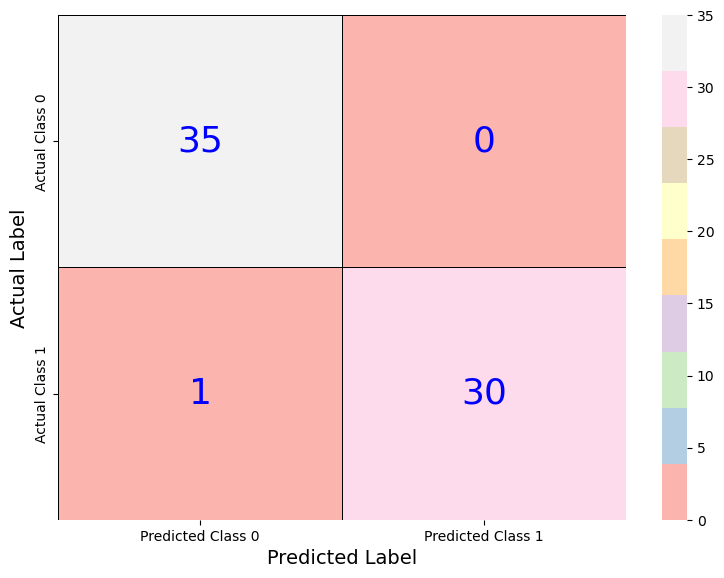

In [30]:
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import math

# Initialize variables
TP = 0
TN = 0
FP = 0
FN = 0
Best_Acc = 0
MOR = 0  # Measure of Reliability
cor_class = 0
j = 1
lb = 0
ub = 4
Net_Acc = 0

# Initialize lists to store true and predicted labels for each subject
Y_true_subjects = []
Y_pred_subjects = []

# Loop through each subject
while j <= 66:
    Y_test = Y_HandPD_New[range(lb, ub)]
    Y_train = np.delete(Y_HandPD_New, range(lb, ub), 0)

    X_test = X_FS_HandPD_New[range(lb, ub)]
    X_train = np.delete(X_FS_HandPD_New, range(lb, ub), 0)

    model = MLPClassifier(solver='lbfgs', alpha=opt_alpha, hidden_layer_sizes=(opt_n1, opt_n2), random_state=1)
    model.fit(X_train, Y_train)
    
    Y_pred = model.predict(X_test)
    scores = accuracy_score(Y_test, Y_pred)
    Net_Acc += scores

    # Store true and predicted labels for the subject
    Y_true_subjects.append(Y_test[0])  # Store the actual label for the subject
    predicted_label = 0  # Default predicted label
    if Y_test.sum() == 0:  # True label is class 0
        if scores >= 0.5:
            TN += 1
            cor_class += 1
            MOR += scores
            predicted_label = 0  # Correct prediction for class 0
        else:
            predicted_label = 1  # Incorrect prediction for class 0
    elif Y_test.sum() == 4:  # True label is class 1
        if scores > 0.5:
            TP += 1
            cor_class += 1
            MOR += scores
            predicted_label = 1  # Correct prediction for class 1
        else:
            predicted_label = 0  # Incorrect prediction for class 1
    
    Y_pred_subjects.append(predicted_label)  # Store the predicted label

    lb += 4
    ub += 4
    j += 1

# Calculate confusion matrix
cm_subjects = confusion_matrix(Y_true_subjects, Y_pred_subjects)

# Calculate overall metrics
LOSO_Acc = (Net_Acc * 100) / 66
Subj_Acc = (cor_class * 100) / 66
Final_MOR = (MOR * 100) / cor_class if cor_class > 0 else 0
FN = 31 - TP
FP = 35 - TN
Sen = (TP / 31) * 100 if TP > 0 else 0
Spec = (TN / 35) * 100 if TN > 0 else 0

# Check for best accuracy and print metrics
if LOSO_Acc >= Best_Acc:
    Best_Acc = LOSO_Acc
    print("Best Acc ================", Best_Acc)
    print("Subjects Acc =", Subj_Acc)
    print("Subject Acc using TP & TN =", (TP + TN) / 66)
    print("Sen =", Sen)
    print("Spec =", Spec)
    print("MCC =", (TP * TN - FP * FN) / (math.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))) if (TP + FP) * (TP + FN) * (TN + FP) * (TN + FN) > 0 else 1)
    print("MOR =", Final_MOR)
    print("Bal Acc =", (Sen + Spec) / 2)

# Plot the confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm_subjects, annot=True, fmt='g', cmap='Pastel1', cbar=True, 
            xticklabels=['Predicted Class 0', 'Predicted Class 1'], 
            yticklabels=['Actual Class 0', 'Actual Class 1'], 
            linewidths=0.5, linecolor='black', annot_kws={"size": 26, "color": "blue"})

# Customize labels and title
#plt.title('Subject-wise Confusion Matrix', fontsize=16)
plt.ylabel('Actual Label', fontsize=14)
plt.xlabel('Predicted Label', fontsize=14)

# Save the figure as .eps file with proper bounding box
plt.savefig('cm_chiganet_maindata_spirals.eps', format='eps', dpi=300, bbox_inches='tight')

# Save the figure as .jpg file
plt.savefig('cm_chiganet_maindata_spirals.jpg', format='jpg', dpi=300, bbox_inches='tight')

# Show the plot
plt.tight_layout(pad=1.5)
plt.show()


# **External Validation of the Developed Models on New Data**

In [31]:
# Testing the Developed or Construced Model as Indepdendent Testing or Blind Test or Secondary level testing
# for measureing the Generlaization Capabilities of the developed model.
# From, paper point of view, use the same L1SVM-ANN for the Hand Crafted Features and compare their performance
# and generlization capabilites

In [32]:
################# The Below Three Statements are much important bcoz if we do not use, Y or Y_test size is (4,) i.e.
# it is a column vector having no dimenstion. So we cannot use it with numpy.vstack(), as the above Y_test_total emptyp
#array might have some predefined dimension.
print(Y_HandPD_New.shape)
Y_NewHandPD=Y_HandPD_New[:, numpy.newaxis] # It should be run once. We need to restart kernel. Boz if we rerun it, the shape will bcom (4, 1, 1)
print(Y_NewHandPD.shape)
##################################

(264,)
(264, 1)


**1. External Validation of the Optimally Developed NET Model**

In [33]:
# Regenerating Best Results using developed model over New_HandPD Dataset using LOSO CV
# The Below are to create empty arrays for ROC Chart
y_probas_total = numpy.empty((0,2), float)
Y_test_total = numpy.empty((0,1), int)

Best_Acc=0
cor_class=0
j=1
lb=0
ub=4
Net_Acc=0
#Sample_Acc=0
while j<=66:

    Y_test = Y_NewHandPD[range(lb,ub)]
    Y_train = numpy.delete(Y_NewHandPD, range(lb,ub), 0)

    X_test = X_FS_HandPD_New[range(lb,ub)]
    X_train = numpy.delete(X_FS_HandPD_New, range(lb,ub), 0)

    model=MLPClassifier(solver='lbfgs', alpha=opt_alpha,hidden_layer_sizes=(opt_n1, opt_n2), random_state=1)

    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    scores = accuracy_score(Y_test, Y_pred)

    Net_Acc = Net_Acc+scores

    ####################The Below Three Statements are about ROC Chart###################
    y_probas = model.predict_proba(X_test)
    y_probas_total =  numpy.vstack((y_probas_total, y_probas))
    Y_test_total =  numpy.vstack((Y_test_total, Y_test))
    ####################################################################################

    if scores>0.5:
      cor_class=cor_class+1

    lb = lb+4
    ub = ub+4
    j=j+1
LOSO_Acc = (Net_Acc*100)/66
Subj_Acc = (cor_class*100)/66
if (LOSO_Acc>=80 ):
    Best_Acc = LOSO_Acc
    print("Best Acc ================", Best_Acc)
    print("Subjects Acc =", Subj_Acc)

Best Acc ================ 93.18181818181819
Subjects Acc = 95.45454545454545


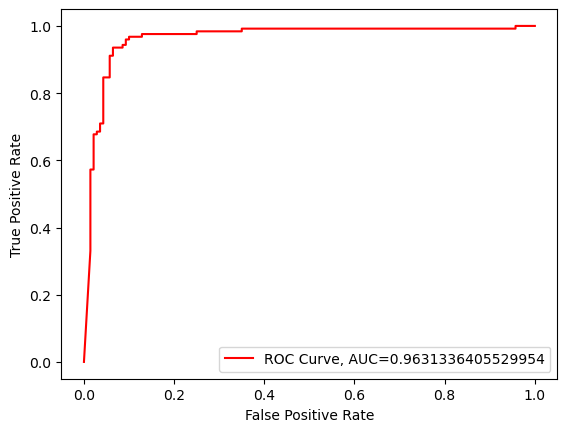

In [34]:
##############ROC############################3333
from sklearn import metrics
import matplotlib.pyplot as plt


####################Below Piece of Code for ROC using Sklearn###########################3
fpr, tpr, _ = metrics.roc_curve(Y_test_total,  y_probas_total[::,1])
auc = metrics.roc_auc_score(Y_test_total, y_probas_total[::,1])
plt.plot(fpr,tpr,color='r',label="ROC Curve, AUC="+str(auc))
#plt.title('ROC Curve under LOSO CV on NewHandPD Database')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


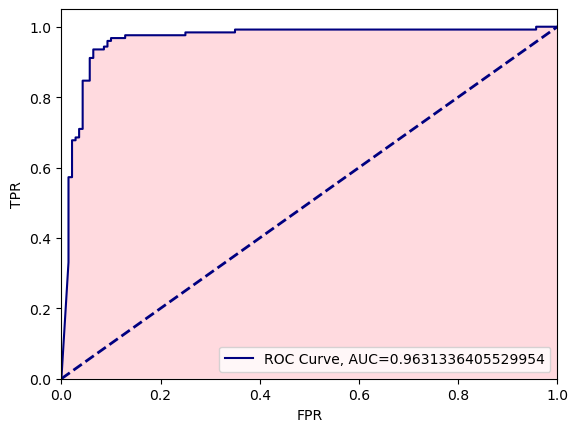

In [35]:
#from sklearn.svm import SVC
from sklearn.metrics import roc_curve,roc_auc_score
#from sklearn.datasets import make_blobs
from sklearn. model_selection import train_test_split
import matplotlib.pyplot as plt



auc = roc_auc_score(Y_test_total,  y_probas_total[::,1])
fpr,tpr, thresholds = roc_curve(Y_test_total, y_probas_total[::,1])
plt.plot(fpr,tpr,color='navy',label="ROC Curve, AUC="+str(auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.fill_between(fpr,tpr,facecolor = 'lightpink', alpha = 0.5)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
#plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc="lower right")
#plt.savefig('main_ROC.eps',format='eps')
images_dir = 'C:/Users/Liaqat Ali/Documents/ChiGaNet'
plt.savefig(f"{images_dir}/ChiGaNet_ROC_LOSOMain_HandPD_Spirals.eps", format='eps')
plt.show()

In [36]:
################# The Below Three Statements are much important bcoz if we do not use, Y or Y_test size is (4,) i.e.
# it is a column vector having no dimenstion. So we cannot use it with numpy.vstack(), as the above Y_test_total emptyp
#array might have some predefined dimension.
print(Y_HandPD.shape)
YHandPD=Y_HandPD[:, numpy.newaxis] # It should be run once. We need to restart kernel. Boz if we rerun it, the shape will bcom (4, 1, 1)
print(YHandPD.shape)
##################################

(368,)
(368, 1)


In [37]:
# (48, 47) 90.71% Acc on testing and 100% under LOSO CV


import numpy
# The Below are to create empty arrays for ROC Chart
y_probas_total = numpy.empty((0,2), float)
Y_test_total = numpy.empty((0,1), int)

Best_Acc=0
MOR=0
cor_class=0
j=1
lb=0
ub=4
Net_Acc=0
#Sample_Acc=0
while j<=92:

    Y_test_sub = YHandPD[range(lb,ub)]
    #Y_train = numpy.delete(Y_Test, range(lb,ub), 0)

    X_test_sub = X_FS_HandPD[range(lb,ub)]
    #X_train = numpy.delete(X_new, range(lb,ub), 0)

    model=MLPClassifier(solver='lbfgs', alpha=opt_alpha,hidden_layer_sizes=(opt_n1, opt_n2), random_state=1)

    model.fit(X_FS_HandPD_New, Y_HandPD_New)
    Y_pred = model.predict(X_test_sub)
    scores = accuracy_score(Y_test_sub, Y_pred)

    Net_Acc = Net_Acc+scores

    ####################The Below Three Statements are about ROC Chart###################
    y_probas = model.predict_proba(X_test_sub)
    y_probas_total =  numpy.vstack((y_probas_total, y_probas))
    Y_test_total =  numpy.vstack((Y_test_total, Y_test_sub))
    ####################################################################################

    if scores>0.5:
      cor_class=cor_class+1
      MOR=MOR+scores

    lb = lb+4
    ub = ub+4
    j=j+1
LOSO_Acc = (Net_Acc*100)/92
Subj_Acc = (cor_class*100)/92
if (LOSO_Acc>=Best_Acc):
    Best_Acc = LOSO_Acc
    print("Best Acc ================", Best_Acc)
    print("Subjects Acc =", Subj_Acc)

Best Acc ================ 87.22826086956522
Subjects Acc = 84.78260869565217


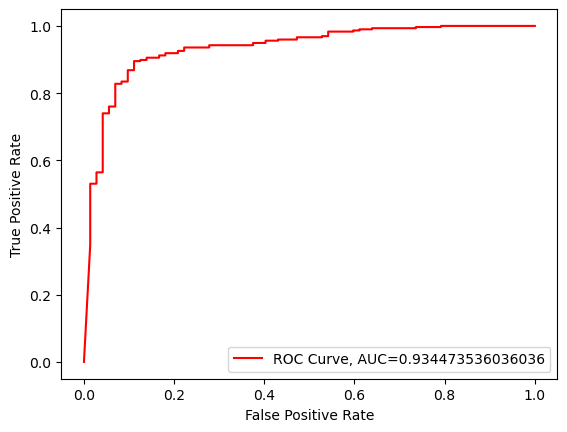

In [38]:
##############ROC############################3333
from sklearn import metrics

import matplotlib.pyplot as plt


####################Below Piece of Code for ROC using Sklearn###########################3
fpr, tpr, _ = metrics.roc_curve(Y_test_total,  y_probas_total[::,1])
auc = metrics.roc_auc_score(Y_test_total, y_probas_total[::,1])
plt.plot(fpr,tpr,color='r',label="ROC Curve, AUC="+str(auc))
#plt.title('ROC Curve for Independent Testing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


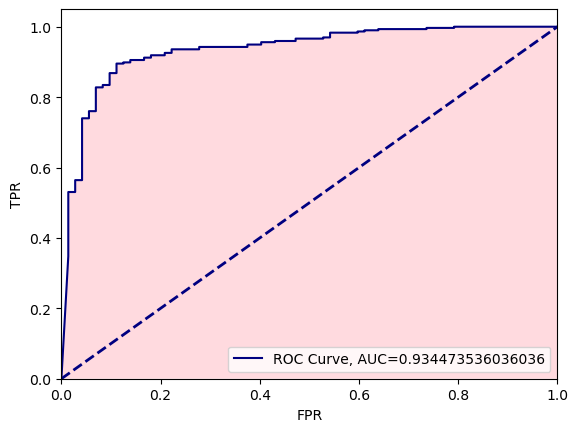

In [39]:
#from sklearn.svm import SVC
from sklearn.metrics import roc_curve,roc_auc_score
#from sklearn.datasets import make_blobs
from sklearn. model_selection import train_test_split
import matplotlib.pyplot as plt



auc = roc_auc_score(Y_test_total,  y_probas_total[::,1])
fpr,tpr, thresholds = roc_curve(Y_test_total, y_probas_total[::,1])
plt.plot(fpr,tpr,color='navy',label="ROC Curve, AUC="+str(auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.fill_between(fpr,tpr,facecolor = 'lightpink', alpha = 0.5)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
#plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc="lower right")
#plt.savefig('main_ROC.eps',format='eps')
images_dir = 'C:/Users/Liaqat Ali/Documents/ChiGaNet'
plt.savefig(f"{images_dir}/ChiGaNet_ROC_IndTesting_HandPD_Spirals.eps", format='eps')
plt.show()

# Confusion Matrix for the NewDataset

In [40]:
# (48, 47) 90.71% Acc on testing and 100% under LOSO CV


import numpy
# The Below are to create empty arrays for ROC Chart
y_probas_total = numpy.empty((0,2), float)
Y_test_total = numpy.empty((0,1), int)

Best_Acc=0
MOR=0
TP=0
TN=0
FP=0
FN=0
cor_class=0
j=1
lb=0
ub=4
Net_Acc=0
#Sample_Acc=0
while j<=92:

    Y_test_sub = YHandPD[range(lb,ub)]
    #Y_train = numpy.delete(Y_Test, range(lb,ub), 0)

    X_test_sub = X_FS_HandPD[range(lb,ub)]
    #X_train = numpy.delete(X_new, range(lb,ub), 0)

    model=MLPClassifier(solver='lbfgs', alpha=opt_alpha,hidden_layer_sizes=(opt_n1, opt_n2), random_state=1)

    model.fit(X_FS_HandPD_New, Y_HandPD_New)
    Y_pred = model.predict(X_test_sub)
    scores = accuracy_score(Y_test_sub, Y_pred)

    Net_Acc = Net_Acc+scores

    ####################The Below Three Statements are about ROC Chart###################
    y_probas = model.predict_proba(X_test_sub)
    y_probas_total =  numpy.vstack((y_probas_total, y_probas))
    Y_test_total =  numpy.vstack((Y_test_total, Y_test_sub))
    ####################################################################################

    if Y_test_sub.sum() == 0:  # True label is class 0
        if scores >= 0.5:
            TN += 1
            cor_class += 1
            MOR += scores
            
    elif Y_test_sub.sum() == 4:  # True label is class 1
        if scores > 0.5:
            TP += 1
            cor_class += 1
            MOR += scores   

    lb = lb+4
    ub = ub+4
    j=j+1
LOSO_Acc = (Net_Acc*100)/92
Subj_Acc = (cor_class*100)/92
FN = 74 - TP
FP = 18 - TN
Sen = (TP / 74) * 100 if TP > 0 else 0
Spec = (TN / 18) * 100 if TN > 0 else 0
if (LOSO_Acc>=Best_Acc):
    Best_Acc = LOSO_Acc
    print("Samples Acc ================", Best_Acc)
    print("Subjects Accuracy using TP and TN", (TP+TN)/92)
    print("Subjects Acc =", Subj_Acc)
    print("Sen =", Sen)
    print("Spec =", Spec)
    print("Bal Acc =", (Sen+Spec)/2)

Samples Acc ================ 87.22826086956522
Subjects Accuracy using TP and TN 0.8478260869565217
Subjects Acc = 84.78260869565217
Sen = 82.43243243243244
Spec = 94.44444444444444
Bal Acc = 88.43843843843844


Samples Acc ================ 87.22826086956522
Subjects Accuracy using TP and TN = 0.8478260869565217
Subjects Acc = 84.78260869565217
Sen = 82.43243243243244
Spec = 94.44444444444444


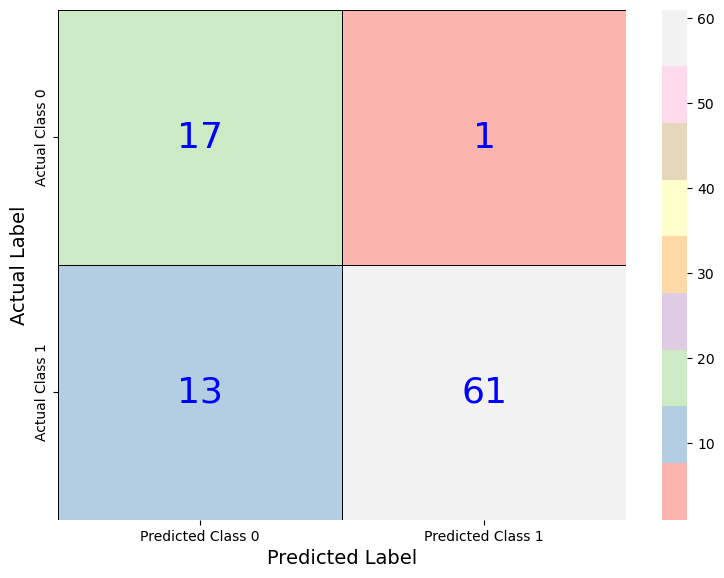

In [41]:
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import math

# Initialize variables
Best_Acc = 0
MOR = 0
TP = 0
TN = 0
FP = 0
FN = 0
cor_class = 0
Net_Acc = 0

# Initialize lists to store true and predicted labels for confusion matrix
Y_true_total = []
Y_pred_total = []

# Loop through each subject
for j in range(0, 92):
    lb = j * 4
    ub = lb + 4

    Y_test_sub = YHandPD[range(lb, ub)]
    X_test_sub = X_FS_HandPD[range(lb, ub)]

    # Fit the model with the original data
    model = MLPClassifier(solver='lbfgs', alpha=opt_alpha, hidden_layer_sizes=(opt_n1, opt_n2), random_state=1)
    model.fit(X_FS_HandPD_New, Y_HandPD_New)
    Y_pred = model.predict(X_test_sub)
    scores = accuracy_score(Y_test_sub, Y_pred)

    Net_Acc += scores

    # Update confusion metrics
    if Y_test_sub.sum() == 0:  # True label is class 0
        if scores >= 0.5:
            TN += 1
            cor_class += 1
            MOR += scores
            Y_true_total.append(0)  # Append actual label
            Y_pred_total.append(0)  # Correct prediction
        else:
            Y_true_total.append(0)  # Actual label
            Y_pred_total.append(1)  # Incorrect prediction
    elif Y_test_sub.sum() == 4:  # True label is class 1
        if scores > 0.5:
            TP += 1
            cor_class += 1
            MOR += scores
            Y_true_total.append(1)  # Append actual label
            Y_pred_total.append(1)  # Correct prediction
        else:
            Y_true_total.append(1)  # Actual label
            Y_pred_total.append(0)  # Incorrect prediction

# Calculate overall accuracy and other metrics
LOSO_Acc = (Net_Acc * 100) / 92
Subj_Acc = (cor_class * 100) / 92
FN = 74 - TP  # Adjust according to the number of true positives
FP = 18 - TN  # Adjust according to the number of true negatives
Sen = (TP / 74) * 100 if TP > 0 else 0
Spec = (TN / 18) * 100 if TN > 0 else 0

if LOSO_Acc >= Best_Acc:
    Best_Acc = LOSO_Acc
    print("Samples Acc ================", Best_Acc)
    print("Subjects Accuracy using TP and TN =", (TP + TN) / 92)
    print("Subjects Acc =", Subj_Acc)
    print("Sen =", Sen)
    print("Spec =", Spec)

# Step to plot and save the confusion matrix
cm = confusion_matrix(Y_true_total, Y_pred_total)

# Plot the confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Pastel1', cbar=True, 
            xticklabels=['Predicted Class 0', 'Predicted Class 1'], 
            yticklabels=['Actual Class 0', 'Actual Class 1'], 
            linewidths=0.5, linecolor='black', annot_kws={"size": 26, "color": "blue"})

# Customize labels and title
#plt.title('Confusion Matrix', fontsize=16)
plt.ylabel('Actual Label', fontsize=14)
plt.xlabel('Predicted Label', fontsize=14)

# Save the figure as .eps file with proper bounding box
plt.savefig('cm_chiganet_newdata_spirals.eps', format='eps', dpi=300, bbox_inches='tight')

# Save the figure as .jpg file
plt.savefig('cm_chiganet_newdata_spirals.jpg', format='jpg', dpi=300, bbox_inches='tight')

# Show the plot
plt.tight_layout(pad=1.5)
plt.show()
